In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

import morphology as morph

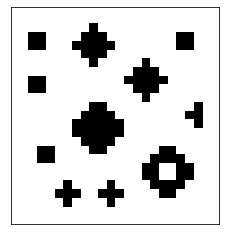

In [2]:
entry = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0],
    [0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
    [0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0],
    [0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0],
    [0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0],
    [0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0],
    [0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0],
    [0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])

plt.imshow(entry, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.show()

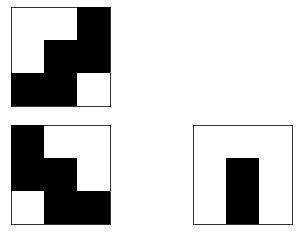

In [3]:
s1 = np.array([
    [0,0,1],
    [0,1,1],
    [1,1,0]
])

s2 = np.array([
    [1,0,0],
    [1,1,0],
    [0,1,1]
])

s3 = s1 * s2

plt.subplot(221)
plt.imshow(s1, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.subplot(223)
plt.imshow(s2, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.subplot(224)
plt.imshow(s3, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.show()

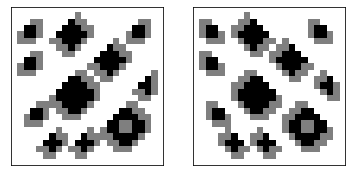

In [4]:
dilation1 = ndimage.binary_dilation(entry, s1)
dilation2 = ndimage.binary_dilation(entry, s2)

plt.subplot(121)
plt.imshow(entry + dilation1, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(entry + dilation2, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])

plt.show()

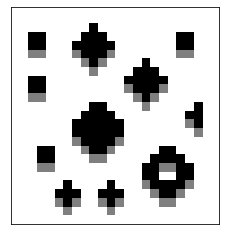

In [5]:
lattice = morph.MatrixLattice(entry.shape)
delta = morph.delta_plus_jies(lattice, [s1, s2], entry)

plt.imshow(entry + delta, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])

plt.show()

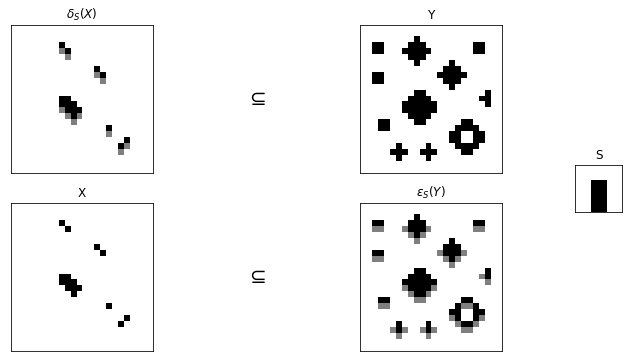

In [6]:
plt.figure(figsize=(12,6))

y = entry
x = ndimage.binary_erosion(y, s1)
dilation_x = ndimage.binary_dilation(x, s3)
erosion_y = ndimage.binary_erosion(y, s3)

ax1 = plt.subplot(1,12,11, adjustable="box")
plt.imshow(s3, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("S")

plt.subplot(2,4,5)
plt.imshow(x, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("X")

plt.subplot(2,4,3)
plt.imshow(y, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("Y")

plt.subplot(2,4,1)
plt.imshow(1 * dilation_x + x, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$\delta_S(X)$")

plt.subplot(2,4,7)
plt.imshow(erosion_y + y, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$\epsilon_S(Y)$")

# Text subplot
ax2 = plt.subplot(2,4,2)
ax2.text(0.5, 0.5, '$\subseteq$',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20,
        transform=ax2.transAxes)
ax2.axis("off")

ax3 = plt.subplot(2,4,6)
ax3.text(0.5, 0.5, '$\subseteq$',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=20,
        transform=ax3.transAxes)
ax3.axis("off")

# plt.subplot(233)
# plt.imshow(dilation_x * y, cmap=plt.cm.gray_r)
# plt.xticks([])
# plt.yticks([])
# plt.title("$\delta_s(x) \cap y$")

# plt.subplot(236)
# plt.imshow(erosion_y * x, cmap=plt.cm.gray_r)
# plt.xticks([])
# plt.yticks([])
# plt.title("$x \cap \epsilon_s(y)$")

plt.show()

Substituting symbol D from STIXGeneral
Substituting symbol D from STIXGeneral
Substituting symbol D from STIXGeneral
Substituting symbol D from STIXGeneral


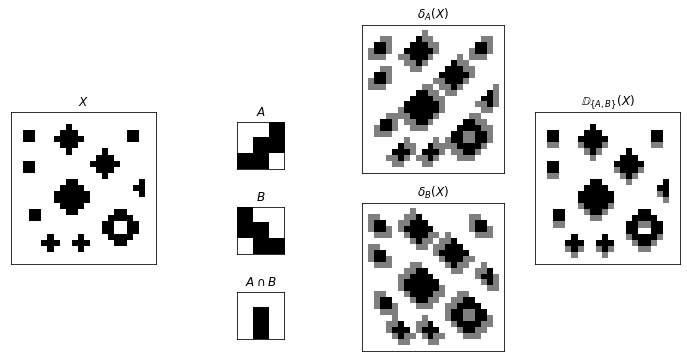

In [7]:
plt.figure(figsize=(12,6))
# Original image - Left
plt.subplot(1, 4, 1)
plt.imshow(entry, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$X$")

# Structuring elements - Middle-Left
plt.subplot(4, 12, 17)
plt.imshow(s1, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$A$")

plt.subplot(4, 12, 29)
plt.imshow(s2, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$B$")

plt.subplot(4, 12, 41)
plt.imshow(s3, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$A \cap B$")

# Dilations - Middle-Right
plt.subplot(2, 4, 3)
plt.imshow(entry + dilation1, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$\delta_{A}(X)$")

plt.subplot(2, 4, 7)
plt.imshow(entry + dilation2, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$\delta_{B}(X)$")

# Delta result - Right
plt.subplot(1, 4, 4)
plt.imshow(entry + delta, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$\mathbb{D}_{\{A, B\}}(X)$")

plt.show()

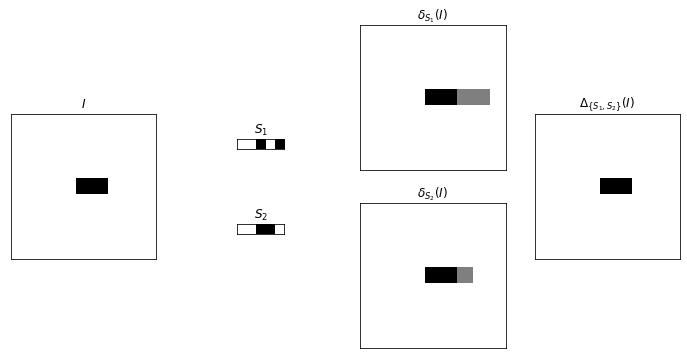

In [8]:
test = np.zeros((9,9))
test[4,4] = 1
test[4,5] = 1
st1 = np.array([[0,0,1,0,1]])
st2 = np.array([[0,0,1,1,0]])
d1 = ndimage.binary_dilation(test, st1)
d2 = ndimage.binary_dilation(test, st2)
d3 = morph.delta_plus_jies(morph.MatrixLattice(test.shape),[st1, st2], test)

plt.figure(figsize=(12,6))
# Original image - Left
plt.subplot(1, 4, 1)
plt.imshow(test, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$I$")

# Structuring elements - Middle-Left
plt.subplot(4, 12, 17)
plt.imshow(st1, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$S_1$")

plt.subplot(4, 12, 29)
plt.imshow(st2, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$S_2$")

# Dilations - Middle-Right
plt.subplot(2, 4, 3)
plt.imshow(test + d1, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$\delta_{S_1}(I)$")

plt.subplot(2, 4, 7)
plt.imshow(test + d2, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$\delta_{S_2}(I)$")

# Delta result - Right
plt.subplot(1, 4, 4)
plt.imshow(d3, cmap=plt.cm.gray_r)
plt.xticks([])
plt.yticks([])
plt.title("$\Delta_{\{S_1, S_2\}}(I)$")

plt.show()

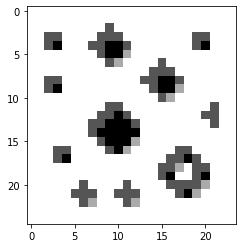

In [9]:

plt.imshow(entry * 2 + ndimage.binary_erosion(entry, [[1,1,0],[1,0,0],[0,0,0]]), cmap=plt.cm.gray_r)

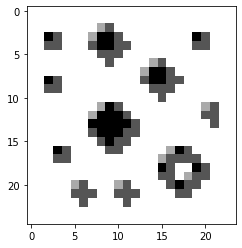

In [10]:
plt.imshow(entry * 2 + ndimage.binary_erosion(entry, [[0,0,0],[0,0,1],[0,1,1]]), cmap=plt.cm.gray_r)